### Object Recognition Demonstration Using Out-of-the-Box Pre-Trained Models
<br>
*Abstract*  
 <div class='text-justify'>
Here, I demonstrate object recognition of arbitrary objects using out-of-the-box pre-trained models. I use OpenCV library for the image processing and Keras library for the object recognition. I supply the unlabeled object to the program either as a saved image or as an image cropped from a live video. The program then processes the image using the built-in pre-trained models (VGG16, VGG19, InceptionV3, Xception, or ResNet50 ) in the Keras library. I will briefly explain what is happening under the hood. Finally, I provide resources for further study.  
</div>



***

### Outline

#### I. OpenCV (10 min)
1. Stream live video   
2. Crop and save image from live video

#### II. Object Recognition (35 min)
A. Implementation (20 min)
1. Define a function for implementing out-of-the-box-pre-trained models    
2. Define a function for cropping an image from a live video and feeding the image into a selected pre-trained model 
3. The GUI Interface
4. What else can we do with out-of-the-box pre-trained models?

B. What is happening under the hood? (15 min)
1. Imagenet: The origin of the pre-trained models  
2. Pre-trained model architecture
3. Pre-trained models comparison  
4. Artificial intelligence - the big picture

#### III. Resources for Further Study

***

### I. OpenCV

1. Streaming a live video

In [ ]:
#http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html

import numpy as np
import cv2

#call VideoCapture method
cap = cv2.VideoCapture(0)

while(True):
    ret, frame=cap.read()
    
    cv2.imshow('video',frame)

    #press 'q' to quit
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break  

#When everything is done, release the capture and destroy window
cap.release()
cv2.destroyAllWindows()

<ol>
2. Crop and save image from live video
</ol>


In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

#initialize image counter
img_counter=0

#activate webcam and read region of interest.
while(True):
    ret, frame=cap.read()
    
    #define rectangular region of interest (roi) for cropping: w=width, h=height
    x=0; y=0; w=224; h=224;
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    #read pixel arrays within the defined rectangle and call it roi
    roi = frame[y:y+h, x:x+w]
    
    #when space button is pressed, take a picture and process image within roi
    #https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv/34588758
    #https://stackoverflow.com/questions/14494101/using-other-keys-for-the-waitkey-function-of-opencv
    if cv2.waitKey(33) == 32:
        # SPACE pressed
        #define image filename
        #img_name = "object_in_roi_{}.png".format(img_counter)
        
        #save image
        #cv2.imwrite(img_name, frame)
        
        #indicate filename of written image
        #print("{} written!".format(img_name))
        
        #increment img_counter
        #img_counter += 1
        
        #add a text on cropped image
        myStr='Hello World!'        
        cv2.putText(roi, myStr, (10,20),1,1,(50,50,50),2)

        #display text on cropped image
        cv2.imshow('Object',roi)
                        
    #display original size image
    cv2.imshow('video',frame)
        
    #press 'q' to quit
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break  

# When everything done, release the capture and destroy window
cap.release()
cv2.destroyAllWindows()

#### II. Object Recognition (35 min)

A. Implementation

1. Define a function for implementing out-of-the-box pre-trained models  


In [2]:
#dynamically set tensorflow backend
#https://stackoverflow.com/questions/49121112/how-do-i-set-the-keras-backend-in-python-dynamically-when-loaded-using-superviso
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras import backend as K

from keras.utils import np_utils

from keras.applications import imagenet_utils

#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

#VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

#VGG19
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19

#ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import ResNet50

#InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from keras.applications.inception_v3 import InceptionV3

#Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions
from keras.applications.xception import Xception


C:\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
#code is copied fully from: https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

def pyimagesearch(model,image_array):
    '''
    Feed image_array into specified pre-trained model and return five best predictions.

        inputs
            model: vgg16, vgg19, inception, xception, or resnet 

            image: specify an image
            
        return
            five best predicted objects and the corresponding probabilities
    '''

    #pyimagesearch
    # define a dictionary that maps model names to their classes
    # inside Keras
    MODELS = {
        "vgg16": VGG16,
        "vgg19": VGG19,
        "inception": InceptionV3,
        "xception": Xception, # TensorFlow ONLY
        "resnet": ResNet50
    }

    # ensure a valid model name was supplied via command line argument
    if model not in MODELS.keys():
        raise AssertionError("The --model command line argument should "
            "be a key in the `MODELS` dictionary")

    # initialize the input image shape (224x224 pixels) along with
    # the pre-processing function (this might need to be changed
    # based on which model we use to classify our image)
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input

    # if we are using the InceptionV3 or Xception networks, then we
    # need to set the input shape to (299x299) [rather than (224x224)]
    # and use a different image processing function
    if model in ("inception", "xception"):
        inputShape = (299, 299)
        preprocess = preprocess_input

    # load our the network weights from disk (NOTE: if this is the
    # first time you are running this script for a given network, the
    # weights will need to be downloaded first -- depending on which
    # network you are using, the weights can be 90-575MB, so be
    # patient; the weights will be cached and subsequent runs of this
    # script will be *much* faster)
    print("[INFO] loading {}...".format(model))
    Network = MODELS[model]
    model = Network(weights="imagenet")

    # load the input image using the Keras helper utility while ensuring
    # the image is resized to `inputShape`, the required input dimensions
    # for the ImageNet pre-trained network
    print("[INFO] loading and pre-processing image...")
    #image = load_img(args["image"], target_size=inputShape)
    #image = img_to_array(image)
    image=image_array
    
    # our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through the network
    image = np.expand_dims(image, axis=0)

    # pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image = preprocess(image)

    # classify the image
    print("[INFO] classifying image with '{}'...".format(model))
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)

    myStr='' #a string variable to concat the five best predictions into a single string
    
    # loop over the predictions and display the rank-5 predictions +
    # probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        myStr+="{}. {}: {:.2f}% \n".format(i + 1, label, prob * 100)
    
    return myStr #this function returns a single string of the five best predictions
        

<ol> 2. Define a function for cropping an image from a live video and feeding the image into a selected pre-trained model  </ol>

In [ ]:
import numpy as np
import cv2

def get_image_from_Video(specify_model):
    '''
    Stream live video and crop an image within the box when user presses space. 
    Feed image into a specified pre-trained model and return the five best predictions.
    
    input
        cropped image from a live video
    
    return
        five best predicted objects and the corresponding probabilities
    '''
    
    cap = cv2.VideoCapture(0)

    #initialize image counter
    img_counter=0

    #activate webcam and read region of interest.
    while(True):
        ret, frame=cap.read()

        #define region of interest (roi): w=width, h=height
        x=0; y=0; w=224; h=224;

        #draw a rectangle
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

        #read pixel arrays and call it roi
        roi = frame[y:y+h, x:x+w]
        
        #initialize myStr
        myStr=' '

        #when space is pressed, take a picture and process image within roi
        #https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv/34588758
        #https://stackoverflow.com/questions/14494101/using-other-keys-for-the-waitkey-function-of-opencv
        if cv2.waitKey(33) == 32:#ord('a'):
            
            #feed image within roi into a selected pre-trained model by calling the function pyimagesearch
            #display prediction as a text
            myStr=pyimagesearch(specify_model,img_to_array(roi)) 
            
            #indicate object name and probability on the image called roi
            #https://stackoverflow.com/questions/27647424/opencv-puttext-new-line-character
            #cv2.putText(roi, myStr, (10,20),1,1,(50,50,50),2)

            y0, dy = 15, 15 #yo is the initial y offset and dy is the subsequent offset
            for i, line in enumerate(myStr.split('\n')):
                y = y0 + i*dy
                cv2.putText(roi, line, (0, y ), 1, 1, 2)

            #display image with text
            cv2.imshow('Object',roi)

            #print object name
            print(myStr)            
            
        #display original size image
        cv2.imshow('video',frame)

        #press 'q' to quit
        if cv2.waitKey(1) & 0xFF== ord('q'):
            break  

    # When everything done, release the capture and destroy window
    cap.release()
    cv2.destroyAllWindows()

<ol> 3. The GUI Interface </ol>

In [ ]:
#https://www.python-course.eu/tkinter_radiobuttons.php
import tkinter as tk
from tkinter.filedialog import askopenfilename

import matplotlib.pyplot as plt
import cv2
import numpy as np

root = tk.Tk()
rdbValue = tk.IntVar()

#call this function if Start button is triggered
def pressed_Start():
    
    # initialize the input image shape (224x224 pixels) along with
    # the pre-processing function (this might need to be changed
    # based on which model we use to classify our image)
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input

    # if we are using the InceptionV3 or Xception networks, then we
    # need to set the input shape to (299x299) [rather than (224x224)]
    # and use a different image processing function
    if optValue.get() in ("inception", "xception"):
        inputShape = (299, 299)
        preprocess = preprocess_input
    
    
    #open up FileDialog window if picture is selected as the image source
    ##https://stackoverflow.com/questions/9239514/filedialog-tkinter-and-opening-files
    if str(rdbValue.get())=="0":
        fname = askopenfilename(filetypes=(("JPG", "*.jpeg"),
                                           ("All files", "*.*") ))
        if fname:
            try:               

                #1. Load image and convert image to array. This image format will be used as input for object prediction.
                image = load_img(fname, target_size=inputShape) #read image from file
                image = img_to_array(image)
                #Call the pyimagesearch() function
                myStr=pyimagesearch(optValue.get(),image)
                
                
                #2. Read image from file. This image format will be used to display the original image.
                img_from_file=cv2.imread(fname,1)
                
                #split prediction result, so that it can be overlaid with image as text.
                y0, dy = 15, 15 #yo is the initial y offset and dy is the subsequent offset
                for i, line in enumerate(myStr.split('\n')):
                    y = y0 + i*dy
                    cv2.putText(img_from_file, line, (0, y ), 1, 1, 2)

                #display image with text
                cv2.imshow('Object',img_from_file)

            except: #give error message if file cannot be read                     
                showerror("Open Source File", "Failed to read file\n'%s'" % fname)
                
            return       
    
    #if Video is selected, call the get_image_from_Video() function
    else:
        #print out prediction results
        print(get_image_from_Video(optValue.get())) #change model to optValue.get() #need to troubleshoot

#label    
tk.Label(root, 
        text="""Choose image source:""",
        justify = tk.LEFT,
        padx = 20).pack()

#radio buttons
rdbValue = tk.IntVar()
options = [("Picture"),("Video")]

for val, language in enumerate(options):
    tk.Radiobutton(root, 
                  text=language,
                  padx = 20, 
                  variable=rdbValue, 
                  value=val).pack(anchor=tk.W)

#label
tk.Label(root, 
        text="""Choose pre-trained model:""",
        justify = tk.LEFT,
        padx = 20).pack()

options = ['', 'vgg16', 'vgg19', 'resnet', 'inception', 'xception']
optValue = tk.StringVar()
optValue.set(options[1])

optModels=tk.OptionMenu(root,optValue,
              *options).pack(anchor=tk.CENTER)

#button
btnStart=tk.Button(root,
          text="Start",
          padx = 80,
         command=pressed_Start).pack(anchor=tk.W)

root.mainloop()

<ol> 4. What else can we do with out-of-the-box pre-trained models (https://www.analyticsvidhya.com/blog/2017/06/transfer-learning-the-art-of-fine-tuning-a-pre-trained-model/)?   

<br>

a. Re-use architecture for a similar task (e.g., object recognition of medical images for disease diagnostics)    
b. Add more classes and re-train to make it smarter:     
  - https://www.tensorflow.org/hub/tutorials/image_retraining  
  - https://becominghuman.ai/transfer-learning-retraining-inception-v3-for-custom-image-classification-2820f653c557      
     
 
</ol>


B. What is happening under the hood?

<ol> 1. Imagenet: The origin of the pre-trained models  
<br>
    - The pre-trained models have been trained using a large number of images (over 14 million imaged from 20,000 categories) from a database called ImageNet.   

    - The various pre-trained models that are built into the Keras library are some of the highest performing Convolutional Neural Networks on the ImageNet challenge over the past few years.       
<br>
**References**:  
1. https://www.image-net.org  
2. https://en.wikipedia.org/wiki/ImageNet  
3. https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/  

</ol>

<ol> 2. Pre-trained model architecture
<br>
<br>
E.g., the VGG16 model architecture (CNN):    

To view the neural network architecture, first create the model object, and then call the summary() method. </ol>

In [3]:
#Command for viewing the neural network architectures

#E.g., create VGG16 model object
model = VGG16() 

#call out summary method
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

<ol> 3. Pre-trained models comparison   
<br>
https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

</ol>

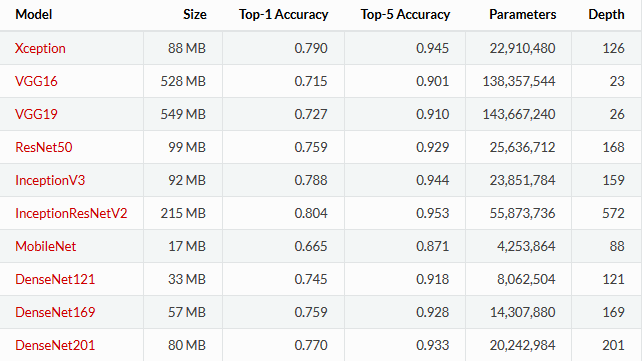

In [4]:
#(i) Built-in pre-trained models in Keras
from IPython.display import Image
from IPython.core.display import HTML 

#https://keras.io/applications/#xception

Image('keras-pretrained_ model.png', width=600, height=400)

In [5]:
Image(url='https://raw.githubusercontent.com/EN10/KerasModels/master/Models.jpg')

In [6]:
Image(url='http://blog.datumbox.com/wp-content/uploads/2018/04/keras-based-image-classifier-with-tensorflow-as-a-back-end-pre-trained-networks-v1-724x540.jpg', width=600, height=400)

<ol> 4. Artificial intelligence - the big picture <ol>

- The big picture  

In [7]:
Image(url= 'http://data-bytes.in/wp-content/uploads/2017/08/AAEAAQAAAAAAAAgIAAAAJDVmNDM2NGJhLTk2OWItNDJiNy05OTYxLWRlYTEyNWNhNTU1Mg.png', width=600, height=400)

In [8]:
Image(url='learning_schematics.png', width=800, height=600)


- The brain function versus the artificial neural network (ANN) model for supervised learning(ref.: Kirill Eremenko and Hadelin de Ponteves, Deep Learning A-Z™: Hands-On Artificial Neural Networks, Section 14-61, Udemy, 2018).

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 

The four lobes of the human brain analogy to the artificial neural network:
    - Frontal lobe (RNN: short-term memory)
    - Parietal Lobe (spatial sense and navigation)
    - Temporal Lobe (ANN: 'permanent' or long-term memory)
    - Occipital Lobe (CNN: visual, recognition)
    
ref.: https://en.wikipedia.org/wiki/Lobes_of_the_brain#Parietal_lobe

In [10]:
Image(url= 'https://www.humanbrainfacts.org/images/resource/human-brain-functions.jpg', width=600, height=400)

- The Neurons Analogy

<center> One neuron </center> | <center> Many Neurons </center>
:-------------------------:|:-------------------------:
![](https://qph.fs.quoracdn.net/main-qimg-e81753ca52a52e99869a97a969132c4e)|![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png) 

- CNN and RNN architectures

In [11]:
#CNN architecture

Image(url= 'https://cdn-images-1.medium.com/max/1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg', width=600, height=400)

In [12]:
#RNN architecture: LSTM

Image(url= 'https://i.ytimg.com/vi/kMLl-TKaEnc/maxresdefault.jpg',width=600, height=400)

### III. Resources for Further Study

keywords: OpenCV, ImageNet, Neural Network, Machine Learning, Deep Learning  

1. pyimagesearch: https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
2. learnopencv: https://www.learnopencv.com/about/
3. packt: https://mapt.packtpub.com
4. udemy: https://www.udemy.com
5. machinelearningmastery: https://machinelearningmastery.com/products/
6. AnalyticsVidhya: https://www.analyticsvidhya.com/
7. Datacamp: https://www.datacamp.com
8. Amazon kindle books


***